### Today’s Objectives:
- Dataset Link : https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Universities.csv
      - K-Means Clustering

### Haar Cascade Files: https://github.com/opencv/opencv/tree/master/data/haarcascades
========================================================================


### Hierarchical Clustering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
univ=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Universities.csv")
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
univ.shape

(25, 7)

In [4]:
# Scale down the data
normalized_data=scale(univ.iloc[:,1:])
normalized_data

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [5]:
## apply linkage 
from scipy.cluster.hierarchy import linkage
a=linkage(normalized_data, method='complete',metric='euclidean')


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [110.0, 110.0, 133.75, 133.75],
  [90.0, 90.0, 121.875, 121.875],
  [75.0, 75.0, 105.9375, 105.9375],
  [65.0, 65.0, 90.46875, 90.46875],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [172.5, 172.5, 203.75, 203.75],
  [235.0, 235.0, 245.0, 245.0],
  [188.125, 188.125, 240.0, 240.0],
  [77.734375, 77.734375, 214.0625, 214.0625],
  [21.875, 21.875, 145.8984375, 145.8984375]],
 'dcoord': [[0.0, 2.3206004512644673, 2.3206004512644673, 0.0],
  [0.0, 1.4912440374881548, 1.4912440374881548, 0.0],
  [0.0, 2.2680312473024973, 2.2680312473024973, 1.4912440374881548],
  [0.0, 3.39

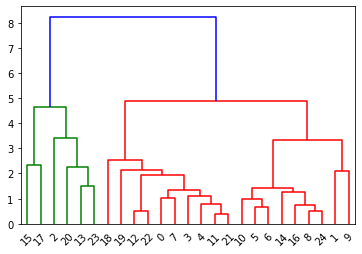

In [6]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(a)

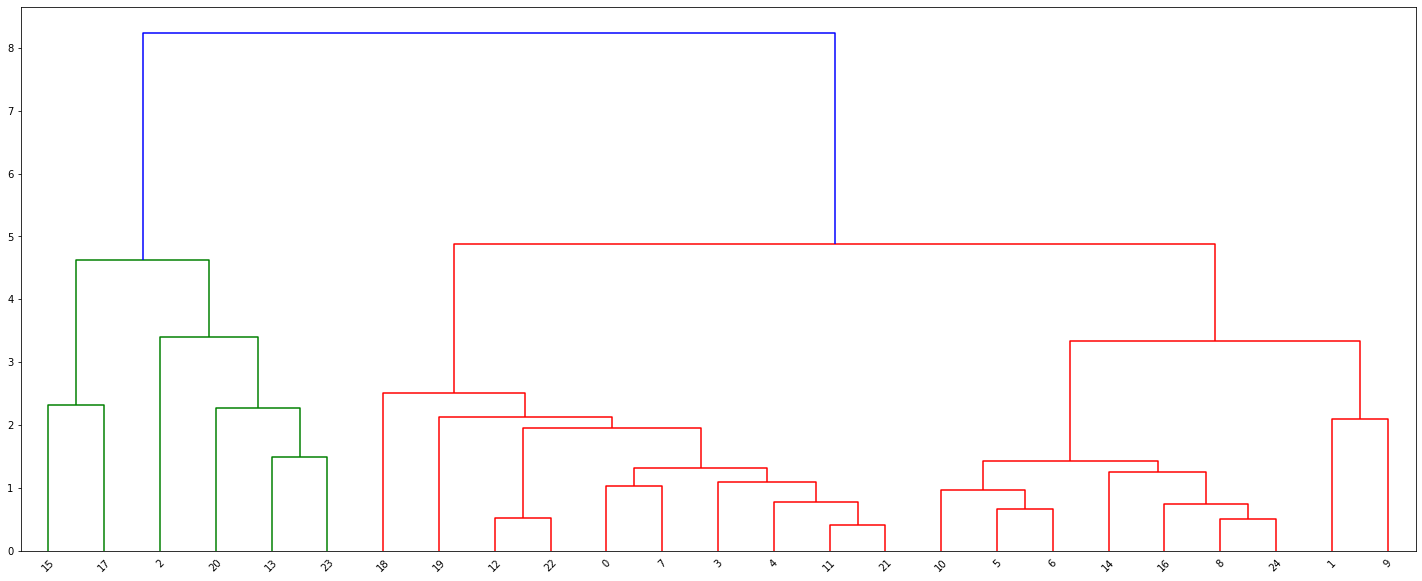

In [7]:
# Dendogram based on complete linkage
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,10))
sch.dendrogram(a)
plt.show()

In [8]:
# Appling clustering
# 5 clusters
# created clusters
from sklearn.cluster import AgglomerativeClustering
clust= AgglomerativeClustering(n_clusters=5, linkage='complete',
                              affinity='euclidean').fit(normalized_data)

In [9]:
# cluster labels
# which univ belong to cluster
clust.labels_

array([2, 0, 4, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 3, 0, 1, 0, 1, 2, 2, 3, 2,
       2, 3, 0], dtype=int32)

In [10]:
# Dataframe for cluster labels
cluster= pd.DataFrame(clust.labels_)
cluster

,0
0,2
1,0
2,4
3,2
4,2
5,0
6,0
7,2
8,0
9,0


In [11]:
# creating a new column cluster in original dataset
# create a new column 'clusterlabels' in univ Dataset
univ['cluster']=cluster
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [12]:
# Rearranging the column in specified order
univ1=univ.iloc[:,[7, 0,1,2,3,4,5,6]]
univ1.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,0,CalTech,1415,100,25,6,63575,81
2,4,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [13]:
# Aggregate the cluster means
# find best cluster using groupby cluster then find the mean
univ1.iloc[:,2:].groupby(univ1.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1040.000000,38.500000,78.500000,22.000000,8885.000000,68.000000
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000
3,1115.333333,47.666667,63.666667,16.333333,12504.000000,78.666667
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


In [14]:
# in this aggregate cluste we find the good an bad cluster
# 0---> best cluster -->analyze based on good accuracy to another all cluster
#1   ---> poor cluster --> analyze based on poor accuracy to another all cluster